<a href="https://colab.research.google.com/github/norayehia/Background-changer-StableDiffusion/blob/main/background_changer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this notebook, we will show how to generate novel images based on a text prompt using the KerasCV implementation of stability.ai's text-to-image model, Stable Diffusion.

Stable Diffusion is a powerful, open-source text-to-image generation model. While there exist multiple open-source implementations that allow you to easily create images from textual prompts, KerasCV's offers a few distinct advantages. These include XLA compilation and mixed precision support, which together achieve state-of-the-art generation speed.

To get started, let's install our dependancies.

In [ ]:
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.7 MB/s eta 0:00:0000:010:01


Import our libraries

In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

2024-06-10 09:59:37.919044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 09:59:37.919174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 09:59:38.095224: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


First, we construct a model:

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


Next, we give it a prompt:

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from rembg import remove
import sys

In [ ]:
images = model.text_to_image("temple in ruines, forest, stairs, columns, cinematic, detailed, atmospheric, epic, concept art, Matte painting, background, mist, photo-realistic, concept art, volumetric light, cinematic epic + rule of thirds octane render, 8k, corona render, movie concept art", batch_size=3)

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


I0000 00:00:1717678568.847480      96 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-06 12:56:08.855617: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
29/50 ━━━━━━━━━━━━━━━━━━━━ 21:20 61s/step

But that's not all this model can do. Let's try a more complex prompt:

In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")




In [ ]:
images = model.text_to_image(
    "A stable Diffusion Article cover image , "
    "Stable diffusion represented, "
    "Stable diffusion concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)

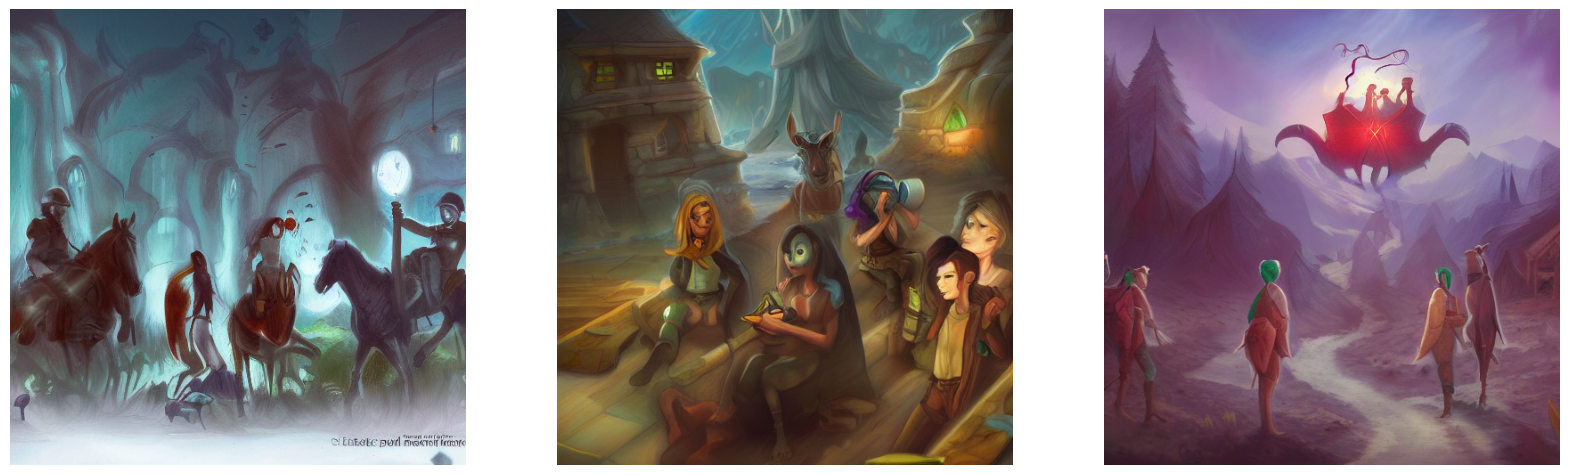

In [ ]:
plot_images(images)

////////////////////////////////////

In [ ]:
pip install rembg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
from PIL import Image
from io import BytesIO
from rembg import remove
import sys

In [ ]:
import os
import sys
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import keras_cv
from rembg import remove
from io import BytesIO

In [ ]:
import keras_cv
import matplotlib.pyplot as plt

In [ ]:
def get_paths():
    input_path = input("Enter the path to the input image: ")
    output_path = input("Enter the desired path for the output image: ")
    return input_path, output_path

input_path, output_path = get_paths()



Enter the path to the input image:  /kaggle/input/imgsdata/person.jpg
Enter the desired path for the output image:  /kaggle/working/o.png


In [ ]:
def validate_output_path(output_path):
    if not any(output_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
        output_path += '.png'  # Default to PNG if no extension is provided
    return output_path

output_path = validate_output_path(output_path)


In [ ]:
output_path

'/kaggle/working/o.png'

In [ ]:
def generate_background_image():
    model = keras_cv.models.StableDiffusion(img_width=960, img_height=540)  # Reduced image size
    text_description = "temple in ruins, forest, stairs, columns, cinematic, detailed, atmospheric, epic, concept art, Matte painting, background, mist, photo-realistic, concept art, volumetric light, cinematic epic + rule of thirds octane render, 8k, corona render, movie concept art"
    background_image = model.text_to_image(text_description, batch_size=1)[0]  # Get the first (only) background image
    # Ensure the background_image is converted to a PIL image
    background_image_pil = Image.fromarray((background_image * 255).astype(np.uint8))  # Convert to 8-bit per channel
    return background_image_pil

background_image2 = generate_background_image()

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 ━━━━━━━━━━━━━━━━━━━━ 2540s 49s/step


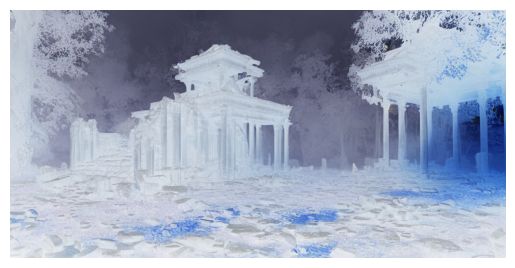

In [ ]:
# Plot the background image
plt.imshow(np.array(background_image2))
plt.axis("off")
plt.show()

**.........................................................**

In [ ]:
import keras_cv
import matplotlib.pyplot as plt
import numpy as np

**Remove back**

In [ ]:
from rembg import remove
from PIL import Image
from io import BytesIO

In [ ]:
def remove_background(input_path):
    with open(input_path, 'rb') as file:
        input_image = file.read()
    foreground_image_data = remove(input_image)
    foreground_image = Image.open(BytesIO(foreground_image_data)).convert('RGBA')
    return foreground_image

In [ ]:


def remove_background(input_path):
    with open(input_path, 'rb') as file:
        input_image = file.read()
    foreground_image_data = remove(input_image)
    foreground_image = Image.open(BytesIO(foreground_image_data))
    return foreground_image

foreground_image = remove_background(input_path)


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 137GB/s]


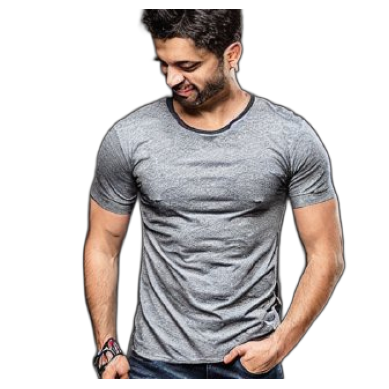

In [ ]:
# Plot the background image
plt.imshow(np.array(foreground_image))
plt.axis("off")
plt.show()

**Resize**

In [ ]:
def resize_background_image(background_image, foreground_image):
    return background_image.resize(foreground_image.size)

In [ ]:
def resize_background_image(background_image, foreground_image):
    return background_image.resize(foreground_image.size)


In [ ]:

background_image_resized = resize_background_image(background_image2, foreground_image)


**combine back with for**

In [ ]:
def combine_images(background_image, foreground_image):
    composite_image = Image.alpha_composite(background_image.convert('RGBA'), foreground_image)
    return composite_image

In [ ]:
def combine_images(background_image, foreground_image):
    composite_image = Image.alpha_composite(background_image.convert('RGBA'), foreground_image)
    return composite_image

composite_image = combine_images(background_image_resized, foreground_image)


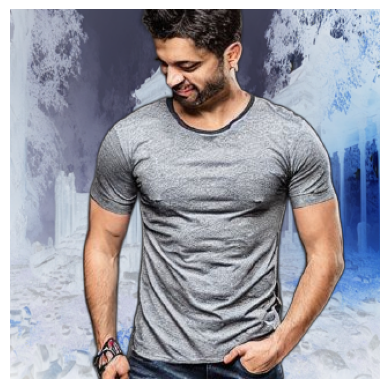

In [ ]:
# Plot the background image
plt.imshow(np.array(composite_image))
plt.axis("off")
plt.show()

**save display final img**

In [ ]:
def save_and_display_image(composite_image, output_path):
    composite_image.save(output_path)
    print(f"Image successfully saved to {output_path}")

    # Plot the final composite image
    plt.imshow(np.array(composite_image))
    plt.axis("off")
    plt.show()

Image successfully saved to /kaggle/working/o.png


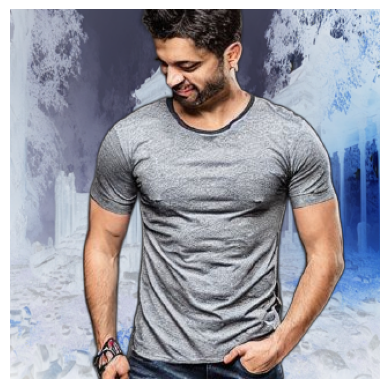

In [ ]:
import numpy as np

def save_and_display_image(composite_image, output_path):
    composite_image.save(output_path)
    print(f"Image successfully saved to {output_path}")

    # Plot the background image
    plt.imshow(np.array(composite_image))
    plt.axis("off")
    plt.show()

save_and_display_image(composite_image, output_path)


**Main**

In [ ]:
def main():
    try:
        input_path, output_path = get_paths()
        output_path = validate_output_path(output_path)
        background_image = generate_background_image()

        # Plot the background image
        plt.imshow(np.array(background_image))
        plt.axis("off")
        plt.show()

        foreground_image = remove_background(input_path)
        background_image_resized = resize_background_image(background_image, foreground_image)
        composite_image = combine_images(background_image_resized, foreground_image)
        save_and_display_image(composite_image, output_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)

if __name__ == "__main__":
    main()

Enter the path to the input image:  /kaggle/input/imgsdata/person.jpg
Enter the desired path for the output image:  /kaggle/working/n.png


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
def main():
    try:
        input_path, output_path = get_paths()
        output_path = validate_output_path(output_path)
        background_image = generate_background_image()
        foreground_image = remove_background(input_path)
        background_image_resized = resize_background_image(background_image, foreground_image)
        composite_image = combine_images(background_image_resized, foreground_image)
        save_and_display_image(composite_image, output_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)

if __name__ == "__main__":
    main()


**##################################################################**

all code above

In [ ]:
import keras_cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from rembg import remove
from io import BytesIO

def get_paths():
    input_path = input("Enter the path to the input image: ")
    output_path = input("Enter the desired path for the output image: ")
    return input_path, output_path

def validate_output_path(output_path):
    if not any(output_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
        output_path += '.png'  # Default to PNG if no extension is provided
    return output_path

def generate_background_image():
    model = keras_cv.models.StableDiffusion(img_width=960, img_height=540)  # Reduced image size
    text_description = "temple in ruins, forest, stairs, columns, cinematic, detailed, atmospheric, epic, concept art, Matte painting, background, mist, photo-realistic, concept art, volumetric light, cinematic epic + rule of thirds octane render, 8k, corona render, movie concept art"
    background_image = model.text_to_image(text_description, batch_size=1)[0]  # Get the first (only) background image
    # Ensure the background_image is converted to a PIL image
    background_image_pil = Image.fromarray((background_image * 255).astype(np.uint8))  # Convert to 8-bit per channel
    return background_image_pil

def remove_background(input_path):
    with open(input_path, 'rb') as file:
        input_image = file.read()
    foreground_image_data = remove(input_image)
    foreground_image = Image.open(BytesIO(foreground_image_data)).convert('RGBA')
    return foreground_image

def resize_background_image(background_image, foreground_image):
    return background_image.resize(foreground_image.size)

def combine_images(background_image, foreground_image):
    composite_image = Image.alpha_composite(background_image.convert('RGBA'), foreground_image)
    return composite_image

def save_and_display_image(composite_image, output_path):
    composite_image.save(output_path)
    print(f"Image successfully saved to {output_path}")

    # Plot the final composite image
    plt.imshow(np.array(composite_image))
    plt.axis("off")
    plt.show()

def main():
    try:
        input_path, output_path = get_paths()
        output_path = validate_output_path(output_path)
        background_image = generate_background_image()

        # Plot the background image
        plt.imshow(np.array(background_image))
        plt.axis("off")
        plt.show()

        foreground_image = remove_background(input_path)
        background_image_resized = resize_background_image(background_image, foreground_image)
        composite_image = combine_images(background_image_resized, foreground_image)
        save_and_display_image(composite_image, output_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)

if __name__ == "__main__":
    main()
